In [1]:
import numpy as np
import matplotlib.pyplot as plt

from data.datahandler import DataHandler

In [5]:
dh = DataHandler('data')
df = dh.get_combined_dataframes()
print(df.head())

kelp = df[df['product'] == 'KELP']
resin = df[df['product'] == 'RAINFOREST_RESIN']
ink = df[df['product'] == 'SQUID_INK']

   day  timestamp           product  bid_price_1  bid_volume_1  bid_price_2  \
0   -2          0  RAINFOREST_RESIN         9996             1       9995.0   
1   -2          0              KELP         1998            26          NaN   
2   -2          0         SQUID_INK         1998            26          NaN   
3   -2        100         SQUID_INK         1999             5       1998.0   
4   -2        100  RAINFOREST_RESIN        10000             5       9995.0   

   bid_volume_2  bid_price_3  bid_volume_3  ask_price_1  ask_volume_1  \
0          25.0          NaN           NaN        10004             1   
1           NaN          NaN           NaN         2002            26   
2           NaN          NaN           NaN         2002            26   
3          26.0          NaN           NaN         2001            20   
4          20.0          NaN           NaN        10005            20   

   ask_price_2  ask_volume_2  ask_price_3  ask_volume_3  mid_price  \
0      10005.0  

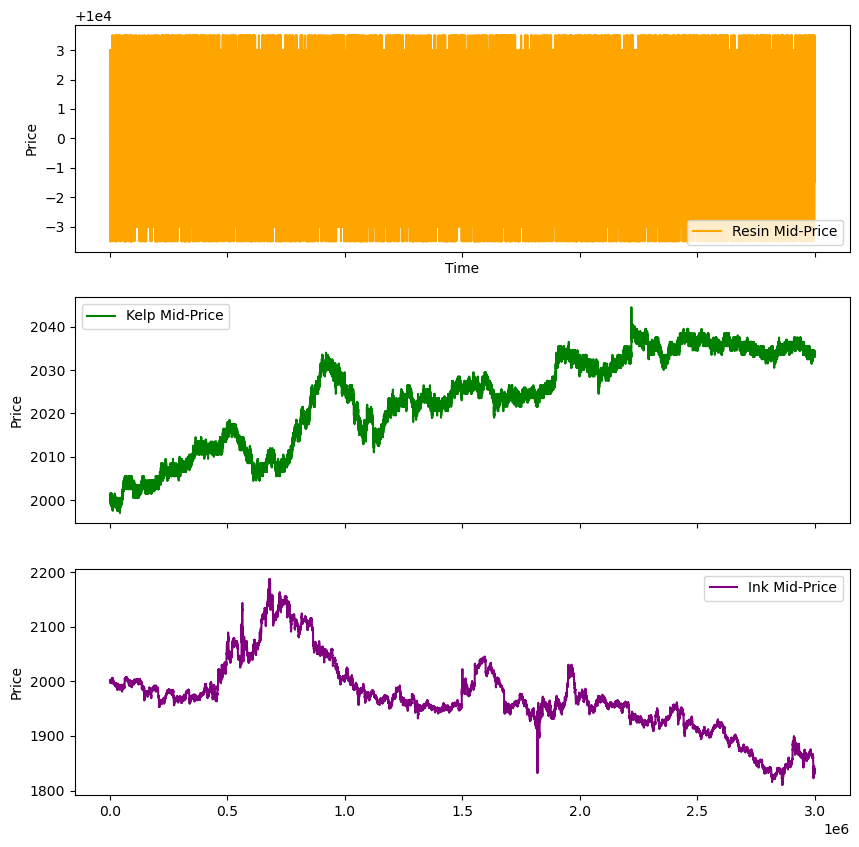

In [20]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
axes[0].set_ylabel('Price')
axes[1].set_ylabel('Price')
axes[2].set_ylabel('Price')
axes[0].set_xlabel('Time')
axes[0].plot(resin['index'], resin['mid_price'], label='Resin Mid-Price', color='orange')
axes[1].plot(kelp['index'], kelp['mid_price'], label='Kelp Mid-Price', color='green')
axes[2].plot(ink['index'], ink['mid_price'], label='Ink Mid-Price', color='purple')
axes[0].legend()
axes[1].legend()
axes[2].legend()

In [24]:
print(np.corrcoef(resin['mid_price'], kelp['mid_price']), '\n')
print(np.corrcoef(resin['mid_price'], ink['mid_price']), '\n')
print(np.corrcoef(kelp['mid_price'], ink['mid_price']), '\n')

[[1.         0.00205415]
 [0.00205415 1.        ]] 

[[1.         0.00380536]
 [0.00380536 1.        ]] 

[[ 1.        -0.5914886]
 [-0.5914886  1.       ]] 



In [38]:
print(np.var(resin['mid_price']), np.std(resin['mid_price']), '\n')
print(np.var(kelp['mid_price']), np.std(kelp['mid_price']), '\n')
print(np.var(ink['mid_price']), np.std(ink['mid_price']), '\n')

2.2397130974999997 1.4965671042422386 

118.76486284888888 10.897929291791577 

4609.740808212223 67.89507204659424 



(-15.0, 15.0)

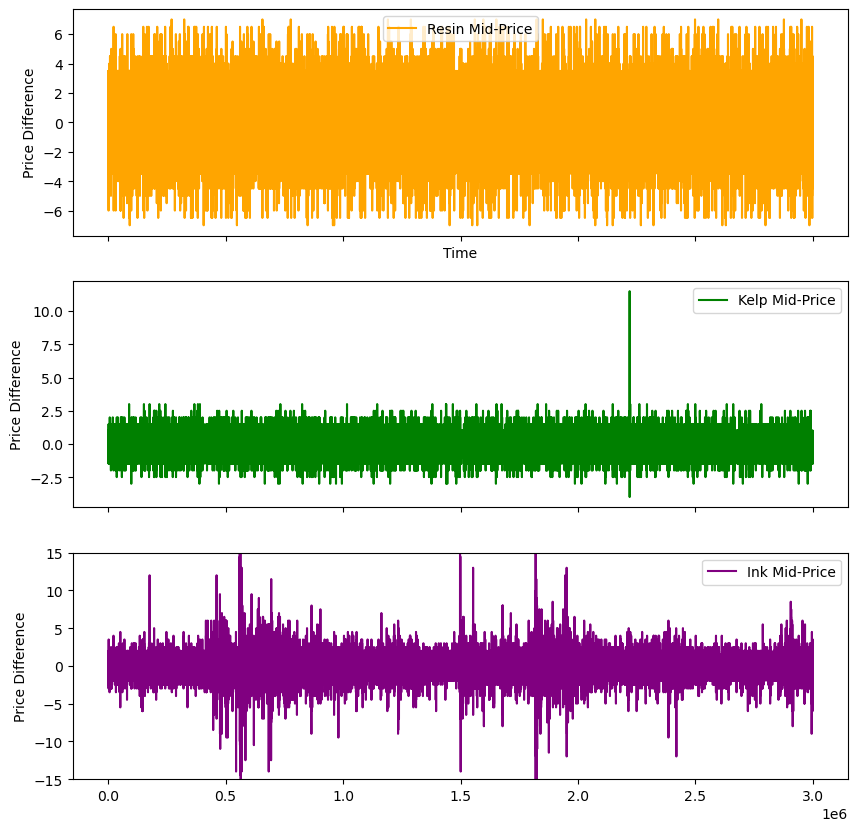

In [31]:
fig, axes = plt.subplots(3, 1, figsize=(10, 10), sharex=True)
axes[0].set_ylabel('Price Difference')
axes[1].set_ylabel('Price Difference')
axes[2].set_ylabel('Price Difference')
axes[0].set_xlabel('Time')
axes[0].plot(resin['index'], resin['mid_price'].diff(), label='Resin Mid-Price', color='orange')
axes[1].plot(kelp['index'], kelp['mid_price'].diff(), label='Kelp Mid-Price', color='green')
axes[2].plot(ink['index'], ink['mid_price'].diff(), label='Ink Mid-Price', color='purple')
axes[0].legend()
axes[1].legend()
axes[2].legend()
axes[2].set_ylim(-15,15)

In [29]:
rd = resin['mid_price'].diff()[1:]
kd = kelp['mid_price'].diff()[1:]
id = ink['mid_price'].diff()[1:]

print(np.corrcoef(rd, kd), '\n')
print(np.corrcoef(rd, id), '\n')
print(np.corrcoef(kd, id), '\n')

[[1.        0.0902126]
 [0.0902126 1.       ]] 

[[1.         0.02758606]
 [0.02758606 1.        ]] 

[[1.        0.3103656]
 [0.3103656 1.       ]] 



In [35]:
kelp['mid_price'].values - ink['mid_price'].values

array([  0.,   1.,   2., ..., 200., 195., 194.], shape=(30000,))

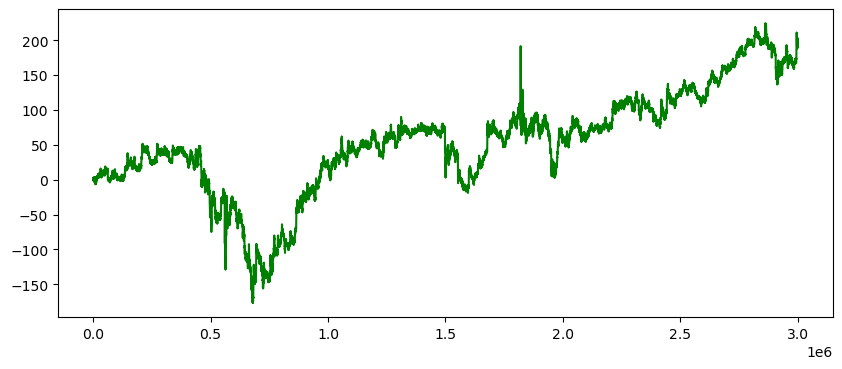

In [36]:
fig, axes = plt.subplots(1, 1, figsize=(10, 4))
axes.plot(kelp['index'], kelp['mid_price'].values - ink['mid_price'].values, label='Kelp - Ink', color='green')